## Predicting Student Academic Performance Using Regression
Student performance is influenced by several academic and personal factors such as background, preparation level, and learning environment. In this project, we analyze student-related data and build a machine learning model that predicts overall exam performance.
The objective is not only prediction, but also understanding how different factors contribute to student outcomes using a regression approach.

In [36]:
import pandas as pp
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data =pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
print(data.shape)

(1000, 8)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [40]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [41]:
data.rename(columns={
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
}, inplace=True)

In [42]:
data["average_score"] = (
    data["math_score"] +
    data["reading_score"] +
    data["writing_score"]
) / 3

In [43]:
data.isnull().sum()
data.ffill(inplace=True)

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in data.select_dtypes(include="object").columns:
    data[column] = encoder.fit_transform(data[column])

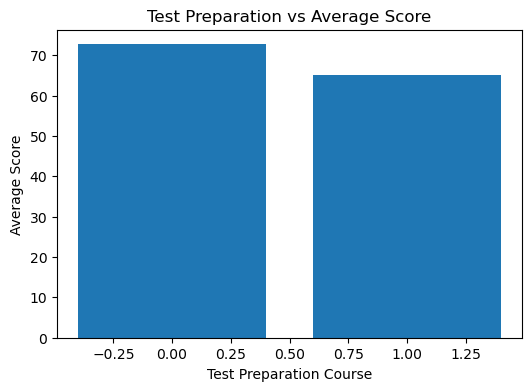

In [45]:
preparation_scores = data.groupby("test preparation course")["average_score"].mean()
plt.figure(figsize=(6,4))
plt.bar(preparation_scores.index, preparation_scores.values)
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.title("Test Preparation vs Average Score")
plt.show()

<Figure size 600x400 with 0 Axes>

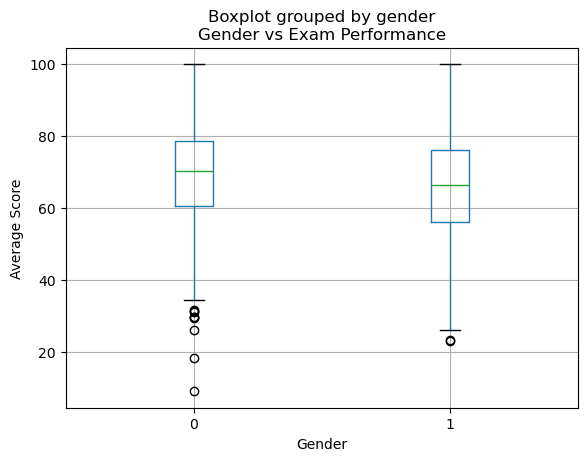

In [46]:
plt.figure(figsize=(6,4))
data.boxplot(column="average_score", by="gender")
plt.title("Gender vs Exam Performance")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()

In [47]:
features = data.drop(
    ["math_score", "reading_score", "writing_score", "average_score"],
    axis=1
)
target = data["average_score"]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=7
)

In [49]:
from sklearn.linear_model import LinearRegression
score_model = LinearRegression()
score_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
predicted_scores = score_model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predicted_scores)
r2 = r2_score(y_test, predicted_scores)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 153.63419456612937
R2 Score: 0.1749988975215142


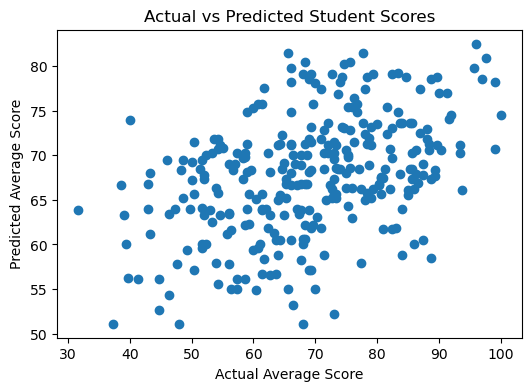

In [52]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, predicted_scores)
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Actual vs Predicted Student Scores")
plt.show()

## Conclusion
The regression model was able to learn meaningful relationships between student background factors and exam performance. The results indicate that test preparation and parental education have a noticeable impact on scores.
This project demonstrates how regression techniques can be applied to real-world educational data and serves as a strong foundation for future machine learning work.
